## Chapter 14

### 합성곱 층(convolutional layer)

* 첫 번째 합성곱 층의 뉴런은 입력 이미지의 모든 픽셀에 연결되는 것이 아닌, 합성곱 층 뉴런의 수옹장 안에 있는 픽셀에만 연결.
* 두 번째 합성곱 층의 뉴런은 첫번째 층의 작은 사각 영역 안에 위치한 뉴런에 연결.
* 이러한 구조는 네트워크가 첫 번째 은닉층에서는 작은 저수준 특성에 집중하고, 그 다음 은닉층에서는 더 큰 고수준 특성으로 조합해나가도록 도와줌.

* 기존 다층 신경망은 한 줄로 길게 늘어선 뉴런으로 구성되어있었으므로, 입력 이미지를 1차원 배열로 펼처야 했음.
* CNN에서는 각 층이 2차원으로 표현되므로 뉴런을 그에 상응하는 입력과 연결하기 쉬움.

* 합성곱 층의 $i$행 $j$열에 있는 한 뉴런은 이전 층의 $i$에서 $i+f_h-1$까지의 행과, $j$에서 $j+f_w-1$까지의 열에 있는 뉴런의 출력에 연결됨.
  * $f_h, f_w$ : 수용장의 높이와 너비
* 일반적으로 수용장의 높이와 너비를 이전 층과 동일하게 유지하기 위해 입력 주변에 0을 추가하는데, 이를 **제로 패딩(zero padding)** 이라고 함.

* 수용장 사이에 간격을 두어, 큰 입력층을 훨씬 작은 층에 연결하는 것도 가능함. 이는 모델의 계산 복잡도를 크게 낮춰줌.
* 한 수용장과 다른 수용장 사이의 간격을 **스트라이드(stride)** 라고 함.
  * 상위층의 $i$행, $j$열의 뉴런이 이전 층의 $i\times s_h$에서 $i\times s_h+f_h-1$까지의 행과 $j\times s_w+f_w-1$까지의 열에 위치한 뉴런과 연결됨.
  * $s_h, s_w $ :스트라이드의 수직값과 수평값 

* 뉴런의 가중치는 수용장 크기의 작은 이미지로 표현 가능.
  * ex) 필터(filter, 또는 합성곱 커널 convolution kernel)라고 부르는 두 개의 가중치 세트. 첫 번째는 가운데 흰 수직선이 있는 검은 사각형(가운데 열이 1로 채워져 있고 나머지는 0으로 채워진 7\*7 행렬), 두 번째는 가운데 흰 수평선이 있는 검은 사각형.
  * 첫 번째 필터는 가운데의 수직선 부분을 제외하고 수용장에 있는 모든 것을 무시하게 되고, 두 번째 필터는 가운데 수평선 부분을 제외하고는 수용장 안의 모든 것을 무시하게 됨.
  * 첫 번째 필터(와 같은 편향)를 이미지에 적용하면 흰 수직선만 강조되고 나머지는 희미해진 이미지가 나옴.
  * 즉, 층의 뉴런에 적용된 하나의 필터는 하나의 **특성 맵(feature map)** 을 만듦. 특성 맵은 필터를 가장 크게 활성화시키는 이미지의 영역을 강조.
  * 실제로는 필터를 정의할 필요 없이, 훈련하는 동안 합성곱 층이 자동으로 해당 문제에 가장 유용한 필터를 찾고, 상위 층은 이들을 연결하여 더 복잡한 패턴을 학습함.
* 실제 합성곱 층은 여러 가지 필터를 가지고 필터마다 하나의 특성 맵을 출력하므로 3차원으로 표현하는 것이 정확함.
  * 하나의 합성곱 층이 여러 개의 특성 맵을 가짐.
* 각 특성 맵의 픽셀은 하나의 뉴런에 해당.
* 하나의 특성 맵 안에서는 모든 뉴런이 같은 파라미터(동일한 가중치와 편향)를 공유하지만, 다른 특성 맵에 있는 뉴런은 다른 파라미터를 사용.
  * 한 특성 맵의 모든 뉴런이 같은 파라미터를 공유하므로 모델의 전체 파라미터 수를 줄여줄 수 있음.
  * CNN이 한 지점에서 패턴을 인식하도록 학습되었다면 다른 위치에 있는 패턴도 인식할 수 있지만, DNN은 한 지점의 패턴을 인식하도록 학습되었다면 오직 해당 패턴이 동일한 위치에 있을 때만 감지할 수 있음.
* 한 뉴런의 수용장은 이전 층에 있는 모든 특성 맵에 걸쳐 확장됨. 즉, 하나의 합성곱 층이 입력에 여러 필터를 동시에 적용하여 입력에 있는 여러 특성을 감지할 수 있음.
* 입력 이미지는 컬러 채널(보통 R, G, B)마다 여러 sublayer로 구성되기도 함.
  * 흑백 이미지는 하나의 채널만 가지고, 위성 이미지 등은 매우 많은 채널을 가질 수도 있음.

* 합성곱 층 $l$에 있는 $k$ 번째 특성 맵의 $i$행 $j$열에 위치한 뉴런은, 이전 $l-1$번째 층에 있는 모든 특성 맵의  $i\times s_h$에서 $i\times s_h+f_h-1$까지의 행과 $j\times s_w+f_w-1$까지의 열에 위치한 뉴런의 출력에 연결됨.
* 다른 특성 맵이더라도 동일한 위치 $i$행 $j$열에 위치한 뉴런이라면 위와 동일한, 이전 층의 뉴런들의 출력에 연결됨.

$$z_{i,j,k}=b_k+\sum_{u=0}^{f_h-1}\sum_{v=0}^{f_w-1}\sum_{k'=0}^{f_{n'}-1}x_{i',j',k'}\times w_{u,v,k',k}$$

> * $i'=i\times s_h+u$
> * $j'=j\times s_w+v$
> * $z_{i,j,k}$ : 합성곱 층($l$층)의 $k$ 특성 맵의 $i$행 $j$열에 위치한 뉴런의 출력
> * $s_h, s_w, f_h, f_w$ : 각각 수직 스트라이드, 수평 스트라이드, 수용장의 높이, 수용장의 너비
> * $f_{n'}$ : 이전 층에 있는 특성 맵의 수
> * $x_{i',j',k'}$ : $l-1$(이전 층)층의 $i'$행 $j'$열 $k'$특성 맵에 있는 뉴런의 출력
> * $b_k$ : $l$층의 $k$특성 맵의 편향. 특성 맵의 전체 밝기를 조절하는 일종의 다이얼 역할을 함(특성 맵마다 하나의 편향이 있으므로 편형값을 조절하면 한 특성 맵의 전체 뉴런의 값이 커지거나 작아짐.)
> * $w_{u,v,k',k}$ : $l$층의 $k$특성 맵에 있는 모든 뉴런과 뉴런의 수용장에 연관된 $u$행, $v$열, $k'$특성 맵에 위치한 입력 사이의 연결 가중치

* 텐서플로에서 각 입력 이밎는 [높이, 너비, 채널] 형태의 3차원 텐서로 표현됨.
* 하나의 미니배치는 [미니배치 크기, 높이, 너비, 채널] 형태의 4차원 텐서로 표현됨.
* 합성곱 층의 가중치는 [$f_h,f_w,f_{n'},f_n$]형태의 4차원 텐서로 표현됨.
* 합성곱 층의 편향은 [$f_n$]형태의 1차원 텐서로 표현됨.

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from functools import partial

<function matplotlib.pyplot.show(close=None, block=None)>

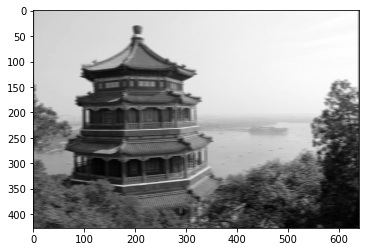

In [9]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg") / 255        # 중국 사원 이미지
flower = load_sample_image("flower.jpg") / 255      # 꽃 이미지
                                                    # 두 이미지 모두 컬러 이미지. 각 컬러 채널의 픽셀 강도는 0~255값을 가진 바이트 하나로 표현됨. 이를 255로 나눠 0~1사이의 실수로 바꿈.
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# 2개의 필터 생성
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1     # 수직선 필터
filters[3, :, :, 1] = 1     # 수평선 필터

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")  # 필터를 두 이미지에 적용
                                                                    # stride는 1, padding은 제로 패딩("SAME")
                                                                    # images : 입력의 미니배치(4차원 텐서)
                                                                    # filters : 적용될 필터(4차원 텐서)
                                                                    # strides : 1 또는 4개의 원소를 갖는 1차원 배열 지정 가능. 배열 사용 시 가운데 두 개의 원소는 수직, 수평 스트라이드이고
                                                                    #           첫 번째와 마지막 원소는 1.
                                                                    # padding : "VALID" 시, 제로 패딩을 사용하지 않음.

plt.imshow(outputs[0, :, :, 1], cmap="gray")    # 첫 번째 이미지(0)의 두 번째 특성 맵(1) 표시
plt.show

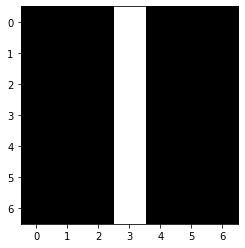

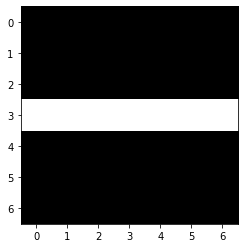

In [4]:
# 필터 형태
plt.imshow(filters[:, :, 0, 0], cmap="gray")
plt.show()
plt.imshow(filters[:, :, 0, 1], cmap="gray")
plt.show()

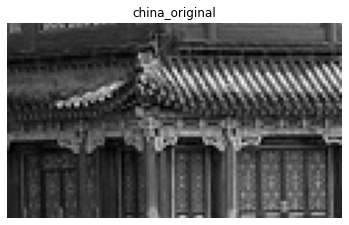

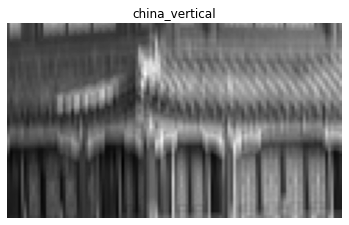

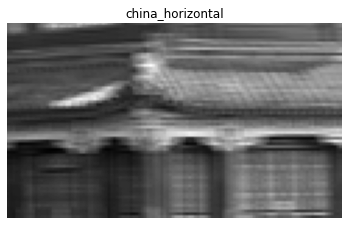

In [5]:
# 이미지의 특성 맵 출력(이미지의 일부분만 표시)
def crop(images):
    return images[150:220, 130:250]

plt.imshow(crop(images[0, :, :, 0]), cmap="gray", )
plt.title("china_original")
plt.axis("off")
plt.show()

for feature_map_index, title in enumerate(["china_vertical", "china_horizontal"]):
    plt.imshow(crop(outputs[0, :, :, feature_map_index]), cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

> * strides로 주는 1차원 배열의 첫 번째 원소와 마지막 원소는 언젠가 배치 스트라이드, 채널 스트라이드를 지정하는 데 사용될 수 있지만 현재는 1, 1을 사용
> * padding="VALID"시, 스트라이드에 따라 입력 이미지의 아래 행, 오른쪽 열이 무시될 수 있음. 모든 뉴런의 수용장이 입력 안쪽 영역에만 놓임.
> * padding="SAME"시, 출력 크기는 (입력 뉴런 수/스트라이드) 값을 올림한 것과 같음.

* 위 코드에서는 필터를 직접 지정했지만 실제 CNN에서는 훈련 가능한 변수로 필터를 정의하므로 신경망이 가장 잘 맞는 필터를 학습할 수 있음.

In [10]:
# 3*3크기의 32개의 필터, 수직,수평 방향으로 각각 스트라이드 1, "same" 패딩을 사용하는 Conv2D 층. 출력을 위해 ReLU활성화 함수 사용.
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

In [14]:
# 위의 이미지에 Conv2D 적용
np.random.seed(42)
tf.random.set_seed(42)

conv = keras.layers.Conv2D(filters=2, kernel_size=7, strides=1, padding="same", activation="relu", input_shape=outputs.shape)
conv_outputs = conv(images)

In [15]:
# 층의 출력은 4차원 텐서. 각각 배치 크기(이미지 수), 높이(출력 특성맵의 높이), 너비(출력 특성맵의 너비), 채널(이미지 당 특성 맵 수).
# padding="same", strides=1이므로 출력 특성맵의 높이와 너비는 입력 이미지와 동일(427*640).
conv_outputs.shape

TensorShape([2, 427, 640, 2])

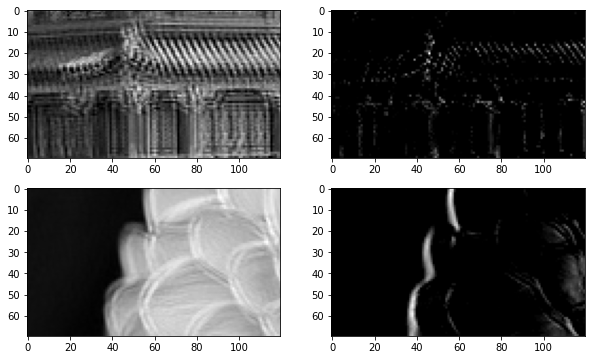

In [16]:
# 이미지 별 출력된 2개의 특성맵 출력.
plt.figure(figsize=(10, 6))

for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index*2 + feature_map_index + 1)
        plt.imshow(crop(conv_outputs[image_index, :, :, feature_map_index]), cmap="gray")
plt.show()

> * 필터가 초기에 랜덤하게 초기화되므로 랜덤한 패턴을 감지함.
> * 첫 번째 필터는 어느정도 edge를 감지한 것으로 보임

In [17]:
# 수동으로 정의한 필터도 사용할 수 있음(단, 훈련 동안 적절한 필터와 편향을 학습하므로 수동으로 지정할 필요가 거의 없음.)
conv.set_weights([filters, np.zeros(2)])
conv_outputs = conv(images)

In [18]:
conv_outputs.shape

TensorShape([2, 427, 640, 2])

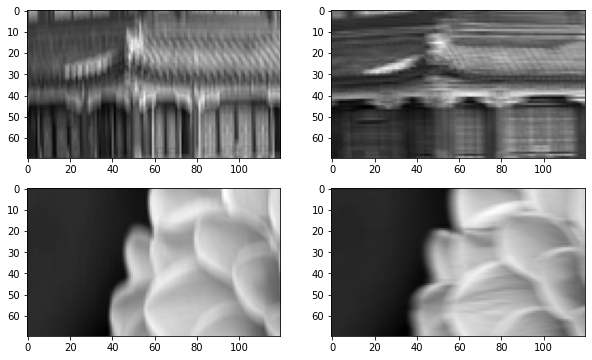

In [19]:
plt.figure(figsize=(10, 6))

for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index*2 + feature_map_index + 1)
        plt.imshow(crop(conv_outputs[image_index, :, :, feature_map_index]), cmap="gray")
plt.show()

* 합성곱 층은 많은 양의 메모리를 필요로 함.
  * 훈련하는 동안 역전파 알고리즘이 역방향 계산을 할 때 정방향에서 계산했던 모든 중간값을 필요로 하기 때문.
  * ex) 5\*5 필터, 스트라이드 1, "same" 패딩을 사용해 150\*100 크기의 특성 맵 200개를 만드는 합성곱 층이 있을 때, 입력이 150\*100 RGB 이미지라면 파라미터 수는 (5\*5\*3 + 1)\*200 = 15200개가 됨(필터는 이전 층의 채널이나 특성 맵의 전체 깊이에 적용되므로 5\*5필터, 채널 3개(RGB)를 곱한 것에 편향이 존재하므로 +1). 이는 완전 연결 층보다는 적지만, 200개의 특성 맵마다 150\*100개의 뉴런을 포함하고, 각 뉴런은 5\*5\*3=75개의 입력에 대한 가중치 합을 계산해야 하므로 약 2억 번 이상의 실수 곱셈이 존재함. 만약, 특성 맵이 32bit 부동소수로 표현된다면 12MB의 메모리를 차지하게 될 것이고, 훈련 배치가 100개의 샘플로 이루어져있다면 약 1.2GB의 메모리를 사용하게 됨.
* 추론(새로운 샘플에 대한 예측을 만듦) 시, 하나의 층이 점유하고 있는 RAM은 다른 층의 계산의 완료되자마자 해제될 수 있으므로 연속된 두 개의 층에서 필요로 하는 메모리 크기만 갖고 있으면 됨.
* 단, 훈련 시 정방향에서 계산했던 모든 값이 역방향 계산에 사용되므로 각 층에서 필요한 메모리 양의 전체 합만큼 필요.
* 메모리 부족으로 훈련리 실패한다면 미니배치 크기를 줄이거나, 스트라이드를 사용해 차원을 줄이거나, 몇개 층을 제거할 수 있음 또는 16bit 부동소수로 낮추거나 여러 장치에 CNN을 분산시킬 수 있음.

### 풀링 층

* 계산량과 메모리 사용량, (과대적합의 위험을 줄여주는) 파라미터 수를 줄이기 위해 입력 이미지의 부표본(축소본)을 만드는 층
* 합성곱 층과 마찬가지로 각 뉴런은 이전 층의 작은 사각 영역의 수용장 안에 있는 뉴런의 출력과 연결됨.
* 크기, 스트라이드, 패딩을 지정해야 하지만, 풀링 뉴런은 가중치가 없음.
  * 최대나 평균 같은 합산 함수를 사용해 입력값을 더함.
* **최대 풀링 층(max pooling layer)** : 각 수용장에서 가장 큰 입력값이 다음 층으로 전달되고 다른 값은 버려짐.
  * ex) 2\*2 풀링 커널(pooling kernel, 또는 풀링 함수)와 스트라이드는 2를 사용, 패딩은 없을 때, 수용장 내의 영역의 값이 1, 5, 3, 2라면 최댓값인 5가 다음 층으로 전달됨. 스트라이드가 2이므로 출력 이미지의 높이와 너비는 입력 이미지의 절반이 되고, 패딩을 사용하지 않았으므로 크기의 소수점 이하는 내림.
  * 최대 풀링 층은 작은 변화에도 일정 수준의 불변성을 만들어 줌.(ex. 어떤 이미지가 1픽셀 정도 이동해도 최대 풀링 층 통과 결과는 동일하게 나올 수 있음.)
  * CNN에 몇 개 층 마다 최대 풀링 층을 추가하면 전체적으로 일정 수준의 이동 불변성을 얻을 수 있음. 또한, 회전, 확대, 축소에 대해 약간의 불변성을 제공.
  * 분류 작업처럼 예측이 작은 부분에 영향을 받지 않는 경우 유용할 수 있음.
  * 단, 층은 파괴적임. 만약 2\*2 커널과 스트라이드 2를 사용하더라도 출력은 양방향으로 절반이 줄어드므로 입력값의 75%를 잃게 됨. 또한 시맨틱 분할과 같은 경우 불변성이 필요로 하지 않을 수 있음.

In [20]:
# tensorflow에서 최대 풀링 층 구현
# 2*2 커널 사용. 스트라이드의 기본값은 커널의 크기와 동일(스트라이드 2 사용). 패딩의 기본값은 "valid"(패딩 없음)
max_pool = keras.layers.MaxPool2D(pool_size=2)

cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

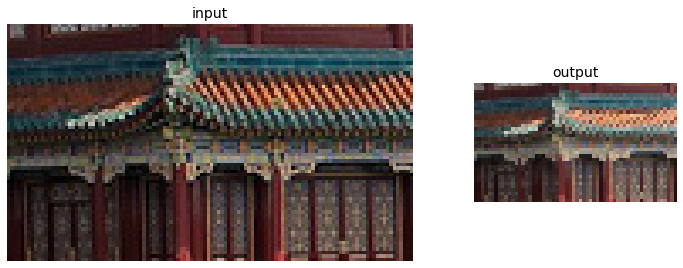

In [21]:
# from https://github.com/rickiepark/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("input", fontsize=14)
ax1.imshow(cropped_images[0])
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("output", fontsize=14)
ax2.imshow(output[0])
ax2.axis("off")
plt.show()

* **평균 풀링 층(average pooling layer)** : 각 수용장 내의 값들의 평균을 계산하여 출력
  * 나머지 부분은 최대 풀링 층과 동일하게 작동
  * <code>AvgPool2D</code> 사용
  * 일반적으로는 최대 풀링 층이 성능이 더 좋아서 많이 사용함.
  * 평균 풀링 층이 일반적으로 정보 손실이 적고 특징을 희석시키지만, 최대 풀링 층은 의미 없는 특징은 제거하고 가장 큰 것만 유지함.

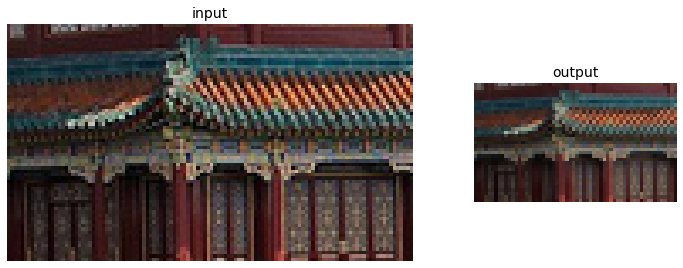

In [22]:
avg_pool = keras.layers.AvgPool2D(pool_size=2)
output2 = avg_pool(cropped_images)

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("input", fontsize=14)
ax1.imshow(cropped_images[0])
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("output", fontsize=14)
ax2.imshow(output2[0])
ax2.axis("off")
plt.show()

* 최대 풀링과 평균 풀링은 공간 차원이 아닌, 깊이 차원(depthwise)으로 수행될 수 있음. 이를 통해 CNN이 다양한 특성에 대한 불변성을 학습할 수 있음.
  * ex) 동일 패턴이 회전된 여러 가지 필터를 학습했을 때, 깊이 방향 최대 풀링 층은 이미지의 회전에 상관없이 동일한 출력을 만듦. 그 외에도 두께, 밝기, 왜곡, 색상 등 어떤 것에 대해서도 불변성을 학습할 수 있음.
* keras에서는 제공하지 않지만 텐서플로 저수준 API를 사용할 수 있음.
  * <code>tf.nn.max_pool()</code>을 사용하고 커널 크기와 스트라이드는 4개의 원소를 가진 튜플로 지정. 튜플의 첫 3개의 값은 모두 1로 지정(배치, 높이, 너비 차원을 따라 커널 크기와 스트라이드가 1이라는 의미). 깊이 차원을 따라 원하는 커널 크기와 스트라이드 값을 튜플의 4번째 값으로 지정(입력 깊이를 나누었을 때 떨어지는 값이어야 함. 만약, 이전 층에서 20개의 특성 맵이 출력된다면 3을 넣으면 작동하지 않음.). 

In [24]:
with tf.device("/cpu:0"):
    output = tf.nn.max_pool(images, ksize=(1,1,1,3), strides=(1,1,1,3), padding="VALID")

* 이를 케라스 코델의 층으로 사용하려면 Lambda층으로 감싸거나 사용자 정의 케라스 층을 만듦.

In [25]:
depth_pool = keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1,1,1,3), strides=(1,1,1,3), padding="VALID")
)

In [27]:
with tf.device("/cpu:0"):
    depth_output = depth_pool(cropped_images)

In [28]:
depth_output.shape

TensorShape([2, 70, 120, 1])

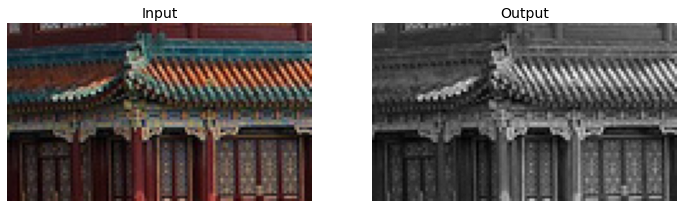

In [29]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input", fontsize=14)
plt.imshow(cropped_images[0])  # 첫 번째 이미지 그리기
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Output", fontsize=14)
plt.imshow(depth_output[0, ..., 0], cmap="gray")  # 첫 번째 이미지 출력 그리기
plt.axis("off")
plt.show()

* 전역 평균 풀링(global average pooling layer) : 각 특성 맵의 평균을 계산. 즉, 각 샘플의 특성 맵 마다 하나의 숫자를 출력하게 됨.
  * 특성 맵의 대부분의 정보를 잃게 되지만, 출력층에서는 유용할 수 있음.
  * <code>keras.layers.GlobalAvgPool2D</code> 사용

In [30]:
global_avg_pool = keras.layers.GlobalAvgPool2D()
global_avg_pool(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.22507192, 0.20967275],
       [0.51288515, 0.45952243, 0.33423486]], dtype=float32)>

> 이는 공간 방향(높이와 너비)을 따라 평균을 계산하는 Lambda층과 동일

In [31]:
output_global_avg2 = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))
output_global_avg2(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.22507192, 0.20967275],
       [0.51288515, 0.45952243, 0.33423486]], dtype=float32)>

### CNN

* 전형적인 CNN구조는 합성곱 층을 몇개 쌓고 (각각 ReLU층을 그 뒤에 놓고), 풀링 층을 쌓고, 그 다음에 또 합성곱 층(과 ReLU 층)을 몇개 더 쌓고, 그 다음 다시 풀링 층을 쌓는 식으로 되어있음.
  * 네트워크를 통과할수록 이미지는 점점 작아지지만, 합성곱 층으로 인해 더 깊어짐(즉, 더 많은 특성 맵을 가짐).
* 마지막에는 몇개의 완전 연결 층으로 구성된 일반적인 피드포워드 신경망(뉴런의 출력이 순환되지 않는 구조. 보통 완전 연결 신경망을 의미)이 추가되고, 마지막 층에서 예측을 출력(클래스 확률을 추정하기 위한 소프트맥스 층 등.)
* 합성곱 층에 너무 큰 커널을 사용하는 것은 좋지 않음.
  * ex) 5*\5 합성곱 층 대신 3\*3 커널 두 개를 쌓는 것이 파라미터와 계산량이 적고 일반적으로 더 나은 성능을 냄.
  * 단, 첫 번째 합성곱 층에서는 일반적으로 큰 크기의 커널과 2이상의 스트라이드를 사용해 너무 많은 정보를 잃지 않고 공간 방향 차원을 줄일 수 있음.

In [74]:
# CNN으로 fashion mnist 문제 풀기

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [80]:
type(X_train)

numpy.ndarray

In [58]:
label_tags = {
    0: 'T-Shirt', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt',
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}

In [34]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]), # 이미지가 아주 크지 않기 때문에 64개의 큰 필터(7*7)와 스트라이드 1 사용.
                                                                                            # 이미지가 28*28크기이고, 채널이 1개이므로(흑백) input_shape=[28, 28, 1]
    keras.layers.MaxPooling2D(2),                                                           # 풀링 크기가 2인 최대 풀링 층을 추가, 공간 방향 차원을 절반으로 줄임.
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),                         # 이후, 합성곱 층 2개-최대 풀링 층 1개 구조를 반복. 이미지가 클 때는 이 구조를 더 많이 반복해야할 수도 있음.
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),                         # 필터 수는 점점 증가(64->128->256). 저수준 특성(동심원, 수평선 등)의 개수는 적지만, 이들을 연결하여 고수준 특성을
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),                         # 만들 수 있기 때문에 합리적인 구조. 보통 풀링 층 다음에 필터 개수를 두 배로 늘리는 것이 일반적인 방법(풀링층이 공간 방향 차원을 절반으로 줄이기 때문).
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),                                                                 # 두 개의 은닉층과 하나의 출력층으로 완전 연결 네트워크 구성. Dense층은 1차원 배열이 필요하므로 Flatten()층 추가
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),                                                              # 층 사이 과대적합을 줄이기 위해 50% 드롭아웃 적용.
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 44s 22ms/step - loss: 0.7271 - accuracy: 0.7459 - val_loss: 0.3841 - val_accuracy: 0.8690
Epoch 2/10
1719/1719 [==============================] - 38s 22ms/step - loss: 0.4297 - accuracy: 0.8559 - val_loss: 0.3274 - val_accuracy: 0.8826
Epoch 3/10
1719/1719 [==============================] - 40s 23ms/step - loss: 0.3681 - accuracy: 0.8751 - val_loss: 0.3182 - val_accuracy: 0.8882
Epoch 4/10
1719/1719 [==============================] - 38s 22ms/step - loss: 0.3390 - accuracy: 0.8859 - val_loss: 0.3021 - val_accuracy: 0.8952
Epoch 5/10
1719/1719 [==============================] - 38s 22ms/step - loss: 0.3055 - accuracy: 0.8957 - val_loss: 0.3108 - val_accuracy: 0.8864
Epoch 6/10
1719/1719 [==============================] - 40s 23ms/step - loss: 0.2958 - accuracy: 0.8999 - val_loss: 0.2777 - val_accuracy: 0.8948
Epoch 7/10
1719/1719 [==============================] - 39s 22ms/step - loss: 0.2794 - accuracy: 0.9050 - val_loss: 0.2816 -

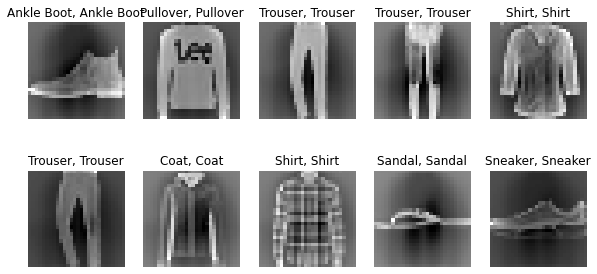

In [73]:
plt.figure(figsize=(10, 5))
for index, image in enumerate(X_new):
    label_index = y_pred[index].argmax(axis=0)
    plt.subplot(2,5,index+1)
    plt.imshow(image, cmap="gray")
    plt.title(f"{label_tags[label_index]}, {label_tags[y_test[index]]}")
    plt.axis("off")
plt.show()

#### LeNet-5

http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

* 1998년 얀 르쿤이 만든 CNN 구조. MNIST에 널리 사용

|층  |종류      |특성 맵|크기  |커널 크기|스트라이드|활성화 함수|
|----|---------|-------|-----|---------|---------|----------|
|출력|완전 연결 |-      |10   |-        |-        |RBF       |
|F6  |완전 연결 |-      |84   |-        |-        |tanh     |
|C5  |합성곱   |120    |1\*1  |5\*5     |1       |tanh      |
|S4  |평균 풀링|16     |5\*5  |2\*2     |2       |tanh      |
|C3  |합성곱   |16     |10\*10|5\*5     |1       |tanh      |
|S2  |평균 풀링|6      |14\*14|2\*2     |2       |tanh      |
|C1  |합성곱   |6      |28\*28|5\*5     |1       |tanh      |
|입력|입력     |1      |32\*32|-        |-       |-         |

* MNIST이미지를 제로 패딩하여 32\*32 크기로 만들고, 네트워크에 주입하기 전에 정규화됨. 입력을 제외한 네트워크의 나머지 부분은 패딩을 사용하지 않으므로 이미지는 점점 크기가 줄어듦.
* 평균 풀링 층의 각 뉴런은 입력의 평균을 계산한 다음, 그 값에 학습되는 계숫값(특성 맵 마다 하나씩 존재)을 곱한 뒤 학습되는 값인 편향(특성 맵마다 하나씩 존재)을 더함. 마지막으로 활성화 함수를 적용
  * 요즘은 평균 풀링에 학습되는 계수나 편향이 없으므로 LeNet-5구현 시 최대 풀링을 많이 사용.
* 합성곱 층 C3의 대부분의 뉴런은 S2의 6개 맵 전체가 아닌, 3\~4개 맵에 있는 뉴런에만 연결됨.
> <p>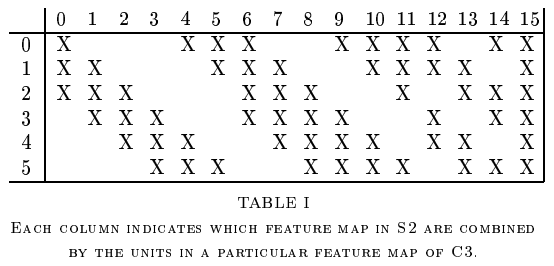</p>
* 출력층에서는 입력과 가중치 벡터를 행렬 곱셈하는 대신, 각 뉴런에서 입력 벡터와 가중치 벡터 사이의 유클리드 거리를 출력. 각 출력은 이미지가 얼마나 특정 숫자 클래스에 속하는지 측정함.
  * 요즘은 크로스 엔트로피 비용 함수를 선호.

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [12]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(6, 5, activation="tanh", padding="same", strides=1, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(16, 5, activation="tanh", padding="valid", strides=1),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(120, 5, activation="tanh", padding="valid", strides=1),
    keras.layers.Flatten(),
    keras.layers.Dense(84, activation="tanh"),
    RBFLayer(10, 0.5)
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10)
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1875/1875 [==============================] - 52s 10ms/step - loss: 0.1808 - accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0577 - accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0433 - accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0361 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0275 - accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0239 - accuracy: 0.9924
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0213 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0190 - accuracy: 0.9943
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 10/10
1/1 [==============================] - 0s 176ms/step

[]

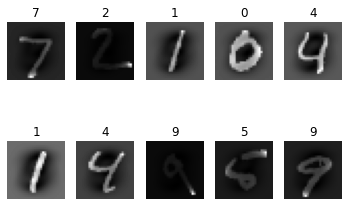

In [24]:
for index, image in enumerate(X_new):
    plt.subplot(2, 5, index+1)
    plt.imshow(image, cmap="gray")
    plt.title(y_pred[index].argmax(axis=0))
    plt.axis("off")
plt.plot()

#### AlexNet

https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

* LeNet-5와 비슷하지만, 더 크고 깊은 CNN구조.
* 합성곱 층 위에 바로 풀링 층을 쌓지 않고, 합성곱 층끼리 쌓음.

|층  |종류      |특성 맵|크기  |커널 크기|스트라이드|패딩|활성화 함수|
|----|---------|-------|-----|---------|---------|----|----------|
|출력|완전 연결 |-      |1000 |-        |-        |-    |Softmax  |
|F10 |완전 연결 |-     |4096  |         |-        |-    |ReLU     |
|F9  |완전 연결 |-     |4096 |          |-        |-    |ReLU     |
|F8  |최대 풀링 |256   |6\*6  |3\*3     |2        |valid|-        |
|C7  |합성곱   |256    |13\*13|3\*3     |1       |same|ReLU       |
|C6  |합성곱   |384    |13\*13|3\*3     |1       |same|ReLU       |
|C5  |합성곱   |384    |13\*13|3\*3     |1       |same|ReLU       |
|S4  |최대 풀링|256     |13\*13|3\*3    |2       |valid|-         |
|C3  |합성곱   |256    |27\*27|5\*5     |1       |same |ReLU      |
|S2  |최대 풀링|96     |27\*27|3\*3     |2       |valid|-        |
|C1  |합성곱   |96     |55\*55|11\*11   |4       |valid|ReLU     |
|입력|입력     |3(RGB) |227\*227|-      |-       |-    |-         |

* 과대적합을 줄이기 위해 규제 기법 사용
  * 훈련하는 동안 F9와 F10의 출력에 dropout을 50%비율로 적용
  * 훈련 이미지를 랜덤하게 여러 간격으로 이동하거나 수평으로 뒤집고 조명을 바꾸는 식으로 데이터 증식 수행.

> 데이터 증식 : 훈련 샘플을 인공적으로 생성하여 훈련 세트의 크기를 늘리는 것. 과대적합을 줄이므로 규제 기법으로 사용할 수 있음. 새로 생성된 데이터는 진짜 데이터에 가까워야 하므로 이미지의 크기를 조금 변경하거나 이동, 회전시킨 뒤 훈련 세트에 추가하여 그림 내의 물체의 위치, 방향, 크기 변화에 덜 민감하게 만들 수 있음. 단순히 white noise를 추가하는 것은 도움되지않음.

* C1, C3의 ReLU단계 후에 LRN(local response normalization)이라고 부르는 정규화 단계 사용.
  * 가장 강하게 활성화된 뉴런이 다른 특성 맵에 있는 같은 위치의 뉴런을 억제함.
  * 특성 맵을 다른 것과 구분되게 하고, 더 넓은 시간에서 특징을 탐색하도록 만들어 일반화 성능을 향상시킴.

$$ b_i=a_i\left(k+\alpha\sum_{j=j_{low}}^{j_{high}}a_j^2\right)^{-\beta},\; \begin{cases}
\displaystyle j_{high}=\text{min}\left(i+\frac{r}{2},f_n-1\right) \\
\displaystyle j_{low}=\text{max}\left(0,i-\frac{r}{2}\right)
\end{cases} $$

* $b_i$ : $i$번쨰 특성 맵의 $u$행 $v$열에 위치한 뉴런의 정규화된 출력. 위 식에서는 현재의 행과 열에 위치한 뉴런에 대한 식이므로 $u, v$는 없음.
* $a_i$ : ReLU단계를 지나고 정규화 단계는 거치기 전인 뉴런의 활성화 값.
* $k, \alpha, \beta, r$ : 하이퍼파라미터. $k$는 편향, $r$은 깊이 반경.
  * $r=2$이고 어떤 뉴런이 강하게 활성화되었다면 해당 뉴런의 위와 아래 특성 맵에 위치한 뉴런의 활성화를 억제함.
  * $k=1$이라면 괄호 안의 식이 항상 1보다 크게 되므로 주변 특성 맵에 있는 뉴런의 활성화 값($a_j$)이 커질수록 뉴런이 출력이 줄어듦.
* $f_n$ : 특성 맵의 수
* AlexNet에서는 $r=2, \alpha=0.00002, \beta=0.75, k=1$로 설정, <code>tf.nn.local_response_normalization()</code>으로 구현할 수 있음.
  * keras에서 사용하려면 Lambda층으로 감싸면 됨.

In [43]:
import tensorflow_datasets as tfds
from keras.optimizers import SGD

In [29]:
test_dataset, train_dataset = tfds.load('cats_vs_dogs', split=('train[:30%]', 'train[20%:]'), as_supervised=True)

In [30]:
def preprocessing(image, label):
    im = tf.cast(image, tf.float32)
    im = tf.divide(im, 255)
    im = tf.image.resize(im, (227, 227))
    
    return im, label

In [31]:
train_batch = train_dataset.map(preprocessing).batch(128).repeat()
test_batch = test_dataset.map(preprocessing).batch(128).repeat()

In [95]:
model = keras.models.Sequential([
    keras.layers.Conv2D(96, 11, strides=4, padding="valid", activation="relu", input_shape=(227,227,3)),    # C1
    keras.layers.Lambda(lambda X: tf.nn.local_response_normalization(X, depth_radius=2, alpha=0.00002, beta=0.75)),
    keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="valid"),     # S2
    keras.layers.Conv2D(256, 5, strides=1, padding="same", activation="relu"),  # C3
    keras.layers.Lambda(lambda X: tf.nn.local_response_normalization(X, depth_radius=2, alpha=0.00002, beta=0.75)),
    keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="valid"), # S4
    keras.layers.Conv2D(384, 3, strides=1, padding="same", activation="relu"),  # C5
    keras.layers.Conv2D(384, 3, strides=1, padding="same", activation="relu"),  # C6
    keras.layers.Conv2D(256, 3, strides=1, padding="same", activation="relu"),  # C7
    keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="valid"), # F8
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation="relu"),    # F9. ;keras.layers.Dense(4096, activation="relu")
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation="relu"),    # F10.  ;keras.layers.Dense(4096, activation="relu")
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")     # Fout  ;keras.layers.Dense(1000, activation="softmax")
])

model.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.01, decay=5e-4, momentum=0.9), metrics=["accuracy"])

d:\conda\envs\tf-gpu\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [96]:
model.fit(train_batch, steps_per_epoch=145, epochs=10)

Epoch 1/10
145/145 [==============================] - 78s 501ms/step - loss: 0.6913 - accuracy: 0.5257
Epoch 2/10
145/145 [==============================] - 74s 513ms/step - loss: 0.6793 - accuracy: 0.5724
Epoch 3/10
145/145 [==============================] - 73s 501ms/step - loss: 0.6549 - accuracy: 0.6115
Epoch 4/10
145/145 [==============================] - 73s 500ms/step - loss: 0.5913 - accuracy: 0.6860
Epoch 5/10
145/145 [==============================] - 74s 509ms/step - loss: 0.5212 - accuracy: 0.7463
Epoch 6/10
145/145 [==============================] - 75s 514ms/step - loss: 0.4659 - accuracy: 0.7811
Epoch 7/10
145/145 [==============================] - 72s 495ms/step - loss: 0.4152 - accuracy: 0.8093
Epoch 8/10
145/145 [==============================] - 72s 494ms/step - loss: 0.3645 - accuracy: 0.8395
Epoch 9/10
145/145 [==============================] - 72s 495ms/step - loss: 0.3282 - accuracy: 0.8564
Epoch 10/10
145/145 [==============================] - 73s 505ms/step - l

In [97]:
test_images = []
test_labels = []
for index, im in enumerate(tfds.as_numpy(test_batch)):
    if(index == 10):
        break
    test_images.append(im[0][0])
    test_labels.append(im[1][0])

In [98]:
pred = model.predict(np.array(test_images))
pred = np.round(pred)

1/1 [==============================] - 0s 269ms/step


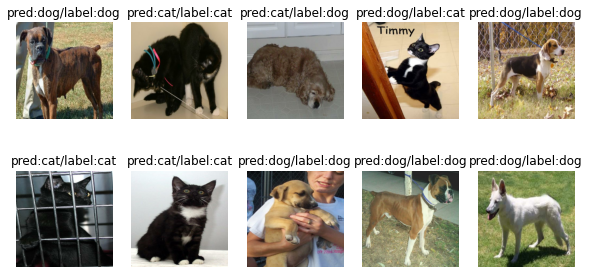

In [99]:
plt.figure(figsize=(10,5))
for index, image in enumerate(test_images):
    plt.subplot(2,5, index+1)
    plt.title(("pred:cat/" if pred[index] == 0 else "pred:dog/")+("label:cat" if test_labels[index] == 0 else "label:dog"))
    plt.axis("off")
    plt.imshow(image)
plt.show()

> ZF Net : AlexNet의 변종. 몇 가지 하이퍼파라미터 설정을 제외하고 동일(https://arxiv.org/abs/1311.2901)

#### GoogLeNet

https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf

* 인셉션 모듈이라는 서브네트워크를 가지고 있어 이전의 구조보다 훨씬 효과적으로 파라미터를 사용.
  * AlexNet보다 10배 적은 파라미터를 가짐

<p>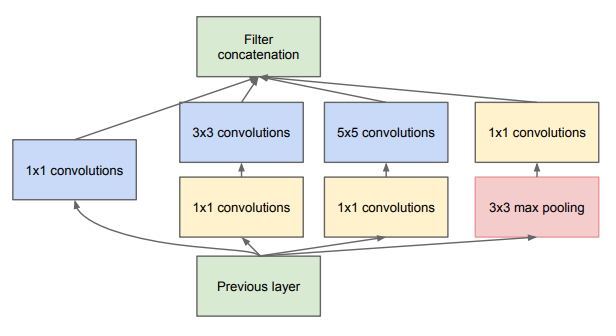</p>

> * 인셉션 모듈의 구조
> * 입력 신호가 복제되어 4개의 다른 층으로 주입됨.
> * 3\*3 등은 커널 크기.
> * 모든 합성곱 층은 ReLU활성화 함수 사용. 풀링 층을 포함한 모든 층은 스트라이드 1과 "same"패딩 사용
>   * 출력의 높이와 너비가 모두 입력과 같으므로 모든 출력을 깊이 연결 층(위의 filter concatenation)에서 깊이 방향으로 연결할 수 있음.
>   * 깊이 연결 층은 <code>axis=3</code> 매개변수(깊이 방향 축을 의미)로 한 <code>tf.concat()</code>을 사용해 구현할 수 있음.
> * 두 번째 합성곱 층(맨 왼쪽의 1\*1 합성곱 층 포함)은 각기 다른 커널 크기를 사용해 다른 크기의 패턴을 잡음.

* 1\*1 커널을 사용하는 합성곱 층은 공간상의 패턴을 잡을 수는 없지만, 깊이 차원을 따라 놓인 패턴은 잡을 수 있음. 또한, 입력보다 더 적은 특성맵을 출력하므로 차원을 줄인다는 의미인 병목 층의 역할을 함(연산 비용과 파라미터 개수를 줄여 훈련 속도와 일반화 성능을 높임).
* 합성곱 쌍(ex. 1\*1과 3\*3)이 한 개의 강력한 합성곱 층처럼 동작할 수 있음.

* 입력 -> 합성곱(64, 7\*7 + 2(same)) -> 최대 풀링(64, 3\*3 + 2(same)) -> LRN -> 합성곱(64, 1\*1 + 1(same)) -> 합성곱(192, 3\*3 + 1(same)) -> LRN -> 최대 풀링(192, 3\*3 + 2(same)) -> 인셉션(64 128 32 32 96 16) -> 인셉션(128 192 96 64 128 32) -> 최대 풀링(480, 3\*3 + 2(same)) -> 인셉션(192 208 48 64 96 16) -> 인셉션(160 224 64 64 112 24) -> 인셉션(128 256 64 64 128 24) -> 인셉션(112 288 64 64 144 32) -> 인셉션(256 320 128 128 160 32) -> 최대 풀링(832, 3\*3 + 2(same)) -> 인셉션(256 320 128 128 160 32) -> 인셉션(384 384 128 128 192 48) -> 전역 평균 풀링(1024, 7\*7 + 1(valid) -> 드롭아웃 40% -> 완전 연결(1000) -> softmax
  * 합성곱/풀링(특성 맵 수, 커널 크기 + 스트라이드(패딩))
  * 인셉션 내의 6개의 정수는 위의 인셉션 모델에서 6개의 합성곱 층에서 출력하는 특성 맵의 수(순서도 그림과 동일)
  * 모든 합성곱 층은 ReLU활성화 함수 사용
* 처음 두 개의 층은 계산의 양을 줄이기 위해 이미지의 높이와 너비를 4배로 줄임(넓이는 16배 감소). 많은 정보를 유지하기 위해 큰 크기의 커널 사용
* LRN층은 이전 층이 다양한 특성을 학습하도록 만듦.
* 다음 두 개의 층에서 첫 번째 층이 병목 층 처럼 작동. 그 다음 3\*3 합성곱 층과 묶여 강력한 합성곱 층 하나처럼 동작.
* 그 다음 다시 LRN층이 다양한 패턴을 학습하도록 만듦.
* 그 다음 최대 푸링 층이 계산 속도를 높이기 위해 이미지의 높이와 너비를 2배로 줄임
* 9개의 인셉션 모듈이 이어지고, 차원 감소와 속도 향상을 위해 최대 풀링 층을 몇개 끼워넣음.
* 전역 평균 풀링 층에서 각 특성 맵의 평균을 출력. 여기서는 공간 방향 정보를 모두 잃지만, 이미 남아있는 공간 정보가 많지 않기 때문에 괜찮음.
  * GoogLeNet은 224\*224크기의 입력 이미지를 기대. 최대 풀링 층에서 이미지의 높이와 너비가 절반으로 줄어드므로 특성 맵의 크기는 7\*7이 됨. 차원 축소가 진행되었으므로 CNN위에 여러 개의 완전 연결 층을 둘 필요가 없음.
* 마지막 층에서 1000개의 클래스를 예측해야 하므로 1000개의 완전 연결 유닛과 소프트맥스 활성화 함수를 적용한 완전 연결 층으로 클래스 확률 추정 값을 출력.

#### VGGNet

https://arxiv.org/abs/1409.1556

* 2개 또는 3개의 합성곱 층 뒤에 풀링 층이 나오고, 다시 2개 또는 3개의 합성곱 층과 풀링 층이 나오는 방식으로 구성됨.
* 마지막 밀집 네트워크는 2개의 은닉층과 출력층으로 이루어짐.
* 3\*3 필터만 사용.

#### ResNet

https://arxiv.org/abs/1512.03385

* 잔차 네트워크를 사용한 모델
* 152개의 층으로 구성된 매우 깊은 CNN. 이후에 나온 모델들도 더 적은 파라미터를 사용해 더 깊은 네트워크를 구성하는 것이 트렌드가 됨.
* 스킵 연결(어떤 층에 주입되는 신호가 상위 층의 출력에 더해지는 것)을 사용.
  * 신경망 훈련은 목적 함수 $h(\mathbf{x})$를 모델링하는 것이 목표.
  * 만약, 입력 $\mathbf{x}$를 네트워크의 출력에 더한다면 네트워크는 $h(\mathbf{x})$대신 $f(\mathbf{x})=h(\mathbf{x})-\mathbf{x}$를 학습하게 되고, 이를 잔차 학습(residual learning)이라고 함.
  * 일반적으로 신경망 초기화 시에는 가중치가 0에 가깝기 때문에 네트워크도 0에 가까운 값을 출력함. 스킵 연결을 추가하게 되면 네트워크는 입력과 같은 값을 출력하므로, 초기에는 항등 함수를 모델링하게 됨. 목적 함수가 항등 함수에 매우 가깝다면 훈련 속도가 매우 빨라짐
  * 스킵 연결을 많이 추가하면 일부 층이 아직 학습되지 않아도 네트워크는 훈련을 시작할 수 있음.
  * 입력 신호가 전체 네트워크에 쉽게 영향을 미치게 됨.
* 스킵 연결을 가진 작은 신경망인 잔차 유닛(RU)을 쌓은 것으로 볼 수 있음.

* 드롭아웃 층을 제외하고는 GoogLeNet과 똑같이 시작하고 끝남(입력 -> 합성곱 -> 최대 풀링 ... -> 평균 풀링 -> 완전 연결 -> softmax). 대신, 그 사이에는 잔차 유닛을 매우 깊에 쌓음.
* 각 잔차 유닛은 배치 정규화, ReLU, 3\*3커널을 사용하고 스트라이드 1, "same" 패딩을 사용하는 두 개의 합성곱 층으로 이루어져 있음.
  * 풀링 층이 없음.
* 몇 개의 잔차 유닛마다 특성 맵의 수는 두 배로 늘어나고, 스트라이드 2 합성곱 층을 사용해 높이와 너비는 절반으로 줄임. 이러한 경우 입력과 출력의 크기가 다르므로 입력이 잔차 유닛의 출력에 바로 더해질 수 없기 때문에 스트라이드 2, 출력 특성맵의 수가 같은 1\*1 합성곱 층으로 입력을 통과시킴.

* ResNet-34 : 34개의 층으로 이루어진 ResNet. 64개의 특성 맵을 출력하는 3개의 RU, 128개 맵의 4개 RU, 256개 맵의 6개 RU, 512개 맵의 3개 RU 사용.
  * ResNet-152 등도 존재. 잔차 유닛의 구조가 다름.

In [4]:
# 잔차 유닛 구현
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation) # 활성화 함수 층(relu)
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides, padding="same", use_bias=False),   # filters, 3*3, strides(2), same padding 합성곱 층
            keras.layers.BatchNormalization(),                                                  # 배치 정규화
            self.activation,                                                                    # ReLU
            keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False),         # filters, 3*3, 스트라이드 1, same padding 합성곱 층
            keras.layers.BatchNormalization()                                                   # 배치 정규화
        ]
        self.skip_layers = []
        if strides > 1: # 만약, 스트라이드가 1보다 크다면 skip_layers를 통과한 결과값을 main_layers를 통과한 결과값과 더하여 출력
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides, padding="same", use_bias=False),   # filters, 1*1, strides(2), same padding 합성곱 층
                keras.layers.BatchNormalization()                                                   # 배치 정규화
            ]
            
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:  # main_layers에 입력을 통과시킴.
            Z = layer(Z)    
        skip_Z = inputs                 # skip_layers에 입력을 통과시킴
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)  # 두 출력을 더한 값에 활성화 함수 적용.

In [6]:
# ResNet-34 구현
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224,224,3], padding="same", use_bias=False))   # 64개 필터, 7*7 커널, 스트라이드 2, same 패딩 합성곱 층
model.add(keras.layers.BatchNormalization())    # 배치 정규화 층
model.add(keras.layers.Activation("relu"))      # relu 활성화 함수
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))   # 3*3, 스트라이드 2, same 패딩 최대 풀링 층
prev_filters = 64
for filters in [64]*3 + [128]*4 + [256]*6 + [512]*3:    # 64개 특성 맵 3개, 128개 특성 맵 4개, 256개 특성 맵 6개, 512개 특성 맵 3개 RU
    strides = 1 if filters == prev_filters else 2       # 이전 유닛의 맵 수와 현재 유닛의 맵 수가 다르면 스트라이드 2 지정, 같으면 1 지정
    model.add(ResidualUnit(filters, strides=strides))   # 잔차 유닛
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())               # 평균 풀링 층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax")) # 출력 층

#### Xception

https://arxiv.org/abs/1610.02357

* GoogLeNet과 ResNet의 아이디어를 합친 대신 인셉션 모듈을 깊이별 분리 합성곱 층(depthwise separable convolution layer)이라는 층으로 대체함.
* 일반적인 합성곱 층이 공간상의 패턴(ex. 타원 형태)과 채널 사이의 패턴(ex. 입+코+눈=얼굴)을 동시에 잡기 위해 필터를 사용하지만, 분리 합성곱 층은 공간 패턴과 채널 사이 패턴을 분리해 모델링할 수 있다고 가정.
  * 두 개의 부분으로 구성. 첫 번째 부분은 하나의 공간 필터(채널 당 한개)를 각 입력 특성 맵에 적용. 두 번째 부분에서는 채널 사이 패턴만 조사.
  * 분리 합성곱 층은 입력 채널마다 하나의 공간 필터만 가지므로 채널이 너무 적은 층(입력층 등) 다음에 사용하는 것을 피해야 함.
  * 일반 합성곱 층 보다 파라미터, 메모리, 연산을 더 적게 사용하고 일반적으로 성능은 더 높음.
* 2개의 일반 합성곱 층으로 시작한 뒤, 나머지는 분리 합성곱만 사용(총 34개)+몇 개의 최대 풀링층과 전역 평균 풀링 층, 밀집 출력 층을 사용.

#### SENet

https://arxiv.org/abs/1709.01507

* 인셉션 네트워크와 ResNet과 같은 기존 구조를 확장한 모델.
* 인셉션 네트워크를 확장한 것을 SE-Inception, ResNet을 확장한 것을 SE-ResNet이라고 함.
* 모든 유닛(인셉션 모듈이나 잔차 유닛)에 SE block이라는 작은 신경망을 추가함.
  * 출력을 깊이 차원에 초점을 맞춰 분석한 뒤 어떤 특성이 일반적으로 가장 크게 활성화되는지 학습함. 그 뒤, 해당 정보를 사용해 특성 맵을 보정함.(ex. SE블록이 그림에서 눈, 코, 입을 학습하였고, 일반적인 사람이 사진에서 입과 코를 보았다면 눈도 볼 수 있다고 기대하므로 입과 코 특성 맵이 강하게 활성되고 눈 특성 맵만 크게 활성화되지 않았다면, SE block이 눈 특성 맵의 출력을 높임.)
  * 하나의 SE블록은 3개의 층으로 구성됨. 전역 평균 풀링 -> ReLU를 사용하는 밀집 은닉층 -> sigmoid를 사용하는 밀집 출력층.
  * 전역 평균 풀링 층은 각 특성 맵에 대한 평균 활성화 값을 계산함. 그 다음 밀집 은닉층에서 압축이 일어남(주로 뉴런의 수는 특성 맵 개수보다 16배 적음. 즉, 16배로 압축.). 합축된 저차원 벡터는 특성 응답의 분포를 표현하고, 이 층을 통해 SE블록이 특성 조합에 대한 일반적인 표현을 학습함. 출력층에서는 이들을 받아 특성 맵마다 0과 1 사이의 하나의 숫자를 담은 보정된 벡터를 출력한 뒤, 특성 맵과 이 보정된 벡터를 곱해 관련없는(보정된 점수가 낮은) 특성값을 낮추고 관련있는 특성값은 그대로 유지함.

### 사전 훈련된 모델 사용

* keras에서는 GoogLeNet이나 ResNet같은 모델은 직접 구현할 필요 없이 사용할 수 있음.

In [11]:
# ImageNet 데이터셋에서 사전훈련된 ResNet-50 모델 로드.
# ResNet-50모델을 만들고 가중치를 다운로드함.
model = keras.applications.resnet50.ResNet50(weights="imagenet")

In [16]:
# 224*224 크기 이미지가 필요하므로 이미지의 크기를 바꿔야 할 수 있음.
images_resized = tf.image.resize(images, [224, 224]) # 각각 위의 동양풍 건물 이미지(monastery), 꽃 이미지(daisy)
                                                     # (2, 427, 640, 3) -> (2, 224, 224, 3)

> 단, <code>tf.image.resize</code>는 이미지의 가로세로 비율을 유지하지 않으므로 문제가 생긴다면 <code>tf.image.crop_and_resize()</code> 사용가능.

In [19]:
# 사전훈련된 모델은 이미지가 전처리되어있다고 가정함. 경우에 따라 값이 0~1 또는 -1~1 값을 기대함.
# 이를 위해 사전 훈련된 모델마다 이미지를 전처리해주는 함수가 존재. 해당 함수는 입력 이미지 값이 0~255라고 가정함(위에서 (이미지/255) 를 했으므로, 다시 255를 곱해주는 작업이 필요)
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

In [21]:
# 예측
# predict()의 출력은 행이 하나의 이미지이고 열이 하나의 클래스(1000개)인 행렬이 나옴.
Y_proba = model.predict(inputs)

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)  # 최상의 k개의 예측을 클래스 이름과 추정 확률과 함께 리스트로 반환
for image_index in range(len(images)):
    print("이미지 #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

1/1 [==============================] - 0s 60ms/step
이미지 #0
  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%
  n02980441 - castle       3.16%
  n03028079 - church       1.00%

이미지 #1
  n03530642 - honeycomb    49.81%
  n13040303 - stinkhorn    33.96%
  n02206856 - bee          4.35%
  n11939491 - daisy        3.23%
  n12985857 - coral_fungus 2.66%



### 사전 훈련된 모델을 사용한 전이 학습

* 충분하지 않은 훈련 데이터로 이미지 분류기를 훈련하려면 사전훈련된 모델의 하위층을 사용하는 것이 좋음.

In [3]:
# 사전훈련된 Xception모델을 사용해 꽃 이미지를 분류하는 모델 훈련
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples    # 데이터셋의 크기
class_names = info.features["label"].names          # 클래스 이름
n_classes = info.features["label"].num_classes      # 클래스 개수

In [4]:
dataset_size

3670

In [5]:
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [6]:
n_classes

5

In [7]:
# 이 데이터셋은 train 세트만 있으므로 이를 검증, 테스트 세트로 나눠야 함.
# test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75]) : deprecated
# test_set = tfds.load("tf_flowers", split=test_split, as_supervised=True)
# valid_set = tfds.load("tf_flowers", split=valid_split, as_supervised=True)
# train_set = tfds.load("tf_flowers", split=train_split, as_supervised=True)

test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True
)

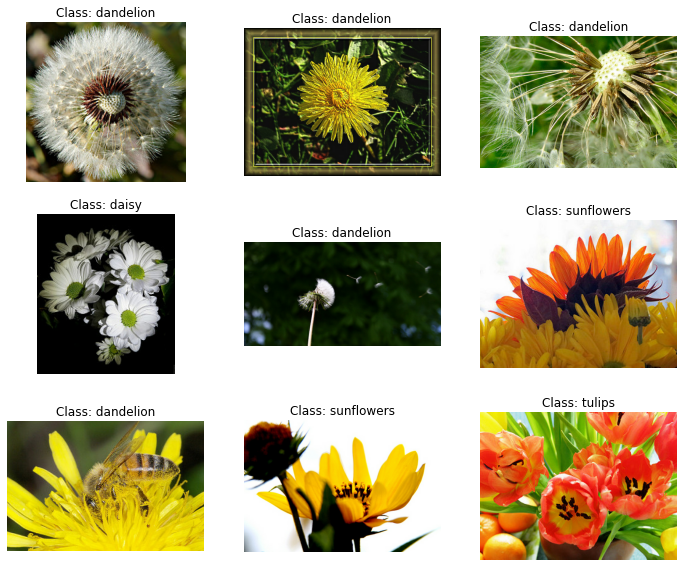

In [8]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")
plt.show()

In [22]:
# 데이터 증식
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image): # 이미지를 랜덤하게 자름
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

# 이미지 전처리. Xception모델이 224*224 크기 이미지를 기대하므로 크기를 조절해야 하고, preprocess_input()으로 전처리해야함.
def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)  # 이미지를 수평으로 랜덤하게 뒤집음
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 16
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [23]:
# 사전훈련된 Xception모델 로드
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)    # include_top=False : 네트워크의 최상층에 해당하는 전역 평균 풀링 층, 밀집 출력 층을 제외
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)      # xception모델에 새로운 전역 평균 풀링 층 추가
output = keras.layers.Dense(n_classes, activation="softmax")(avg)   # 클래스마다 하나의 유닛, softmax활성화 함수를 가진 밀집 출력 층 추가.(n_classes=5)
model = keras.Model(inputs=base_model.input, outputs=output)        # Model 클래스 객체 만들기

In [24]:
# 초기에는 사전훈련된 층의 가중치 동결(11장 참고)
# base_model을 직접 사용하는 것이 아니므로 base_model.trainable=False는 효과가 없음
for layer in base_model.layers:
    layer.trainable = False

In [25]:
# 모델 컴파일, 훈련
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
172/172 [==============================] - 26s 132ms/step - loss: 2.0411 - accuracy: 0.7932 - val_loss: 1.4053 - val_accuracy: 0.8330
Epoch 2/5
172/172 [==============================] - 22s 126ms/step - loss: 0.5651 - accuracy: 0.9259 - val_loss: 1.1475 - val_accuracy: 0.8730
Epoch 3/5
172/172 [==============================] - 22s 126ms/step - loss: 0.2805 - accuracy: 0.9437 - val_loss: 1.0620 - val_accuracy: 0.8621
Epoch 4/5
172/172 [==============================] - 22s 126ms/step - loss: 0.1387 - accuracy: 0.9695 - val_loss: 1.0533 - val_accuracy: 0.8675
Epoch 5/5
172/172 [==============================] - 22s 127ms/step - loss: 0.0953 - accuracy: 0.9757 - val_loss: 1.0023 - val_accuracy: 0.8657


In [26]:
# 동결 해제
for layer in base_model.layers:
    layer.trainable = True

# 모델 재컴파일. 단, 사전훈련된 가중치의 훼손을 막기 위해 훨씬 작은 학습률 사용
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(train_set, epochs=10, validation_data=valid_set)

Epoch 1/10
172/172 [==============================] - 94s 513ms/step - loss: 0.4923 - accuracy: 0.8419 - val_loss: 0.3670 - val_accuracy: 0.8675
Epoch 2/10
172/172 [==============================] - 88s 510ms/step - loss: 0.1304 - accuracy: 0.9553 - val_loss: 0.3619 - val_accuracy: 0.9002
Epoch 3/10
172/172 [==============================] - 88s 510ms/step - loss: 0.0526 - accuracy: 0.9847 - val_loss: 0.3389 - val_accuracy: 0.9129
Epoch 4/10
172/172 [==============================] - 89s 518ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.3292 - val_accuracy: 0.9056
Epoch 5/10
172/172 [==============================] - 92s 534ms/step - loss: 0.0291 - accuracy: 0.9902 - val_loss: 0.3257 - val_accuracy: 0.9038
Epoch 6/10
172/172 [==============================] - 92s 532ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.3301 - val_accuracy: 0.9111
Epoch 7/10
172/172 [==============================] - 91s 527ms/step - loss: 0.0194 - accuracy: 0.9916 - val_loss: 0.3109 - val_ac

In [27]:
model.evaluate(test_set)

23/23 [==============================] - 3s 119ms/step - loss: 0.2923 - accuracy: 0.9373


[0.2922821342945099, 0.9373297095298767]

### 분류와 위치 추정

* 사진에서 물체의 위치를 추정하는 것은 회귀 작업으로 나타낼 수 있음.
* 물체 주위에 바운딩 박스를 예측하는 일반적인 방법은 물체 중심의 수평,수직 좌표와 높이,너비를 예측하는 것. 따라서 모델을 크게 바꿀 필요 없이, 전역 평균 풀링 층 위에 4개의 유닛을 가진 두 번째 밀집 출력 층을 추가하고 MSE를 사용해 훈련.

In [31]:
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)

avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg) # 4개의 유닛을 가진 또 다른 출력층

model = keras.Model(inputs=base_model.input, outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy", "mse"], loss_weights=[0.8, 0.2], optimizer=optimizer, metrics=["accuracy"])  # loss_weights : 손실 함수의 기여도 설정. 더 중요하다고 생각되는 것(class 예측)에 높은 값 부여

> * 실제로는 데이터셋의 꽃 주변에 바운딩 박스가 없으므로 직접 추가해야함.
> * VGG Image Annotator, LabelImg, OpenLabeler, ImgLab등의 오픈소스 이미지 레이블 도구나 LabelBox, Supervisely와 같은 유료 제품을 사용할 수 있음. 또는 크라우드소싱을 사용할 수 있지만, 많은 노력이 드므로 적절한 것을 선택해야함.
> * 여기서는 바운딩 박스가 준비되어있다고 가정. 데이터셋은 클래스 레이블, 바운딩 박스, 전처리된 이미지 배치가 하나의 원소인 데이터셋이 되어야 함. 각 원소의 형태는 (images, (class_labels, bounding_boxes))형태의 튜플
* 바운딩 박스의 높이와 너비, 수평과 수직 좌표는 0과 1사이로 정규화해야 함.
* 높이와 너비는 직접 예측하지 않고 제곱근을 예측함.
* 바운딩 박스에 대한 지표는 주로 IoU(Intersection over Union)을 사용. 예측한 바운딩 박스와 타깃 바운딩 박스 간 겹치는 영역을 전체 영역으로 나눈 것.
  * <code>tf.keras.metrics.MeanIoU</code>에 구현.

### 객체 탐지

* 하나의 이미지에서 여러 물체를 분류하고 위치를 추정하는 작업
* 기존에는 하나의 물체를 분류한 뒤, 위치를 찾는 분류기를 훈련한 다음 CNN영역으로 이미지를 모두 훑는 방식을 사용함.
  * ex)이미지를 6\*8크기의 격자로 나누고, 하나의 CNN이 모든 3\*3영역을 지나감.
  * 매우 쉽지만 조금씩 다른 위치에서 동일한 물체를 여러 번 감지하게 됨.
* 불필요한 바운딩 박스를 제거하기 위해 사후 처리가 필요. 보통 NMS(non-max suppression)을 사용
  * \1. CNN에 또 다른 꽃이 정말 이미지에 존재하는지 확률을 추정하기 위해 존재여부 출력을 추가해야 함. sigmoid 활성화 함수를 사용하고 binary cross entropy손실을 사용해 훈련할 수 있음. 존재여부 점수가 어떤 임곗값 이하인 바운딩 박스는 모두 삭제.(즉, 실제로 꽃이 들어 있지 않은 바운딩 박스가 모두 삭제됨)
  * \2. 존재여부 점수가 가장 높은 바운딩 박스를 찾고, 이 박스와 많이 중첩된(IoU가 높은) 다른 바운딩 박스를 모두 제거.
  * \3. 제거할 바운딩 박스가 없을 때 까지 1, 2 반복
* 위의 방법은 꽤 잘 작동하지만 CNN을 여러 번 실행시켜야하므로 많이 느림.
* 완전 합성곱 신경망(Fully convolutional network, FCN)을 사용하면 CNN을 빠르게 이미지에 슬라이딩시킬 수 있음.
  * https://arxiv.org/abs/1411.4038
  * CNN맨 위의 밀집 층을 합성곱 층으로 바꿀 수 있음.
    * ex) 7\*7 크기(특성 맵 크기) 100개의 특성맵을 출력하는 합성곱 층 위에 200개 뉴련의 밀집 층이 있다고 가정. 이 밀집 층을 7\*7 크기의 필터 200개와 "valid"패딩을 사용하는 합성곱 층으로 바꾸면 이 층은 1\*1크기의 특성 맵 200개를 출력하게 됨.(커널이 입력 특성맵의 크기와 같고, "valid"패딩을 사용했기 때문) 즉, 밀집 층과 마찬가지로 200개의 숫자가 출력되고, 밀집 층이 만드는 숫자와 완전히 동일함. 밀집 층의 출력은 [배치 크기, 200]의 텐서이지만, 합성곱 층은 [배치 크기, 1, 1, 200]크기의 텐서를 출력.
  * 밀집 층은 특정 입력 크기를 기대하지만, 합성곱 층은 어떤 크기의 이미지도 처리할 수 있음(대신, 특정 개수의 채널을 기대함.). FCN은 합성곱 층만 가지므로 어떤 크기의 이미지에서도 훈련하고 실행할 수 있음.
    * ex) 꽃 분류와 위치 추정을 위해 하나의 CNN을 훈련했다고 가정. 224\*224 크기의 이미지를 훈련했고, 10개의 숫자를 출력(0\~4번째 출력은 softmax활성화 함수로 전달되어 클래스 확률을 만드록, 5번째 출력은 로지스틱을 통과해 존재여부 점수 출력, 6\~9번째 출력은 아무 활성화 함수도 통과하지 않고 바운딩 박스의 좌표, 높이, 너비를 출력). 이 밀집 층은 합성곱 층으로 바꿀 수 있으며, 다시 훈련할 필요가 없음.
    * 여기서 224\*224크기의 이미지가 주입되었을 때, 출력층 직전의 합성곱 층이 7\*7 크기 특성맵을 출력한다고 가정. 이 FCN에 448\*448 크기 이미지를 주입하면 해당 층은 14\*14크기 특성맵을 출력하고, 밀집 출력 층이 7\*7 크기의 필터 10개, "valid"패딩, 스트라이드 1을 사용한 합성곱 층으로 바꾼다면 출력은 8\*8크기 특성 맵 10개로 이루어짐. 출력에서의 각 셀(10개의 특성 맵에서 같은 위치에 놓인 배열의 원소)은 10개의 숫자(밀집 층의 출력)를 담고 있고, 이는 기존의 CNN이 행, 열 방향으로 각각 8번 슬라이딩하는것과 같음.
  * 즉, 이미지를 한 번만 봐도 되기 때문에 효율적임.

* YOLO(you only look once) : 매우 빠르고 정확한 객체 탐지 구조
  * https://arxiv.org/abs/1506.02640
  * 실시간으로 영상에도 적용가능.
  * YOLOv2, YOLOv3가 존재.
  * 각 격자 셀마다 5개의 바운딩 박스를 출력하고, 바운딩 박스마다 하나의 존재여부 점수가 부여됨. (20개의 클래스가 있는 PASCAL VOC(https://pjreddie.com/projects/pascal-voc-dataset-mirror/) 데이터셋에서 훈련되었기 때문에 격자 셀 마다 20개의 클래스 확률을 출력하므로 격자 셀마다 총 45개의 숫자(4개의 좌표를 가진 5개의 바운딩 박스=20개, 5개의 존재여부 점수, 20개의 클래스 확률)가 출력됨.)
  * 바운딩 박스 중심의 절대 좌표를 예측하는 대신 격자 셀에 대한 상대 좌표를 예측함. (0,0)은 셀의 왼쪽 위, (1,1)은 셀의 오른쪽 아래.
  * 신경망 훈련 전, 앵커 박스(anchor box, 또는 사전 바운딩 박스)라 부르는 5개의 대표 바운딩 박스 크기를 찾음. 이를 위해 k-평균 알고리즘(9장 참조)을 훈련 세트 바운딩 박스의 높이와 너비에 적용. (ex. 훈련 이미지에 많은 보행자가 있다면 앵커 박스 중 하나는 보행자 크기가 됨.). 그 다음, 신경망이 격자 셀마다 5개의 바운딩 박스를 예측할 때 각 앵커 박스의 크기를 얼마나 조정할 것인지 예측함. 이는 적절한 바운딩 박스로 보이는 것을 빠르게 학습할 수 있기 때문에 훈련 속도를 높여줌.
  * 네트워크가 다른 스케일을 가진 이미지를 사용하여 훈련됨. 훈련하는 동안 몇 번의 배치마다 랜덤하게 새로운 이미지 차원 선택.

> * Tensorflow YOLO 구현 : https://github.com/zzh8829/yolov3-tf2

* mAP(mean average percision) : 객체 탐지에서 널리 사용되는 평가 지표.
  * 정밀도와 재현율(3장 참고)는 트레이드오프 관계에 있음. 하지만, 정밀도/재현율 곡선에서 재현율이 증가할때 정밀도도 증가하는 영역이 포함될 수 있음(특히 재현율 값이 낮을 때). 이로 인해 mAP지표가 만들어짐.
  * 한 분류기가 10% 재현율에서 90% 정밀도를 달성하고, 20% 재현율에서는 96% 정밀도를 달성한다고 가정할 때, 당연히 20% 재현율의 분류기를 사용해야 함. 따라서 10% 재현율에서 정밀도를 보는 것이 아닌, 최소 10% 재현율에서 분류기가 제공할 수 있는 최대 정밀도를 찾아야 함. 여기서는 90%가 아닌, 96%가 됨. 최소 0% 재현율에서 얻을 수 있는 최대 정밀도, 그 다음 10%, 20%, ... ,100%까지 재현율에서의 최대 정밀도를 계산하여 평균한 것을 평균 정밀도(AP)라고 부르고 두 개 이상의 클래스가 있을 때는 각 클래스에 대해 AP를 계산한 다음 평균 AP를 계산하는데, 이것이 mAP.
  * 객체 탐지에서는, 시스템에 정확한 클래스를 탐지했지만 위치가 잘못되었다면(바운딩 박스가 객체 밖으로 벗어났다면) 이를 올바른 예측으로 포함시키지 않아야 함. 이를 위해 IOU임계점을 정의할 수 있음(ex. IOU가 0.5보다 크고 예측 클래스가 맞다면 올바른 예측으로 간주.). 이에 해당하는 mAP는 mAP\@0.5라고 씀.

> * SSD : single shot 탐지 모델(https://arxiv.org/abs/1512.02325)
> * Faster R-CNN : 이미지가 CNN하나를 통과해 그 출력을 RPN(region proposal network)으로 전달. RPN은 객체가 들어있을 가능성이 가장 높은 바운딩 박스를 추출. 이 CNN의 출력을 기반으로 바운딩 박스마다 분류기를 실행(https://arxiv.org/abs/1506.01497)

### 시맨틱 분할

* 물체가 속한 클래스에 따라 모든 픽셀을 분류한느 작업.
* 클래스가 같은 물체는 구별되지 않고 하나의 픽셀 덩어리로 분류될 수 있음.
* 1 이상의 스트라이드를 사용하는 층 때문에 일반적인 CNN을 통과할 때 점진적으로 위치 정보를 잃게 됨.
* 솔루션 중 하나
  * 사전훈련된 CNN을 FCN으로 변환. 이 CNN이 입력 이미지에 적용하는 전체 스트라이드(1보다 큰 스트라이드를 모두 더한 값)는 32(마지막 층이 입력 이미지보다 32배 작은 특성 맵을 출력한다는 뜻)가 됨. 이는 너무 듬성듬성하므로 해상도를 32배로 늘리는 upsampling 층을 추가함.
  * upsampling 방법으로는 이중 선형 보간(bilinear interpolation. 이미지를 4배나 8배로 늘리는 데 적합), 전치 합성곱 층(transposed convolutional layer) 등이 있음.
    * 전치 합성곱 층 : 이미지에 0으로 채워진 빈 행과 열을 삽입하여 늘린 다음, 일반적인 합성곱 수행. 부분 스트라이드를 사용하는 일반 합성곱으로 생각할 수 있음.
    * <code>Conv2DTranspose</code> 층 사용
> * 텐서플로의 합성곱 연산
>   * <code>keras.layers.Conv1D</code> : 1차원 입력에 대한 합성곱 층. 텍스트 등에 사용
>   * <code>keras.layers.Conv3D</code> : 3D PET 스캔 같은 3차원 입력에 대한 합성곱 층
>   * <code>dilation_rate</code> : tf.keras의 합성곱 층에 있는 <code>dilation_rate</code> 매개변수를 2 이상으로 지정하면 아르투스 함성곱 층이 됨. 이는 0으로 된 행과 열을 추가하여 늘린 필터로 보통의 합성곱 층을 사용하는 것과 동일.
>   * <code>tf.nn.depthwise_conv2d()</code> : 깊이 방향 합성곱 층
  * 전치 합성곱 층도 좋은 방법이지만, 여전히 정확도가 떨어짐.
  * 따라서 아래쪽 층 부터 스킵 연결을 추가(ex. 2배로 출력 이미지를 upsampling하고 아래쪽 층의 출력을 더해 해상도를 두 배로 키움. 이후 이 결과를 16배로 늘려 upsampling하여 32배의 upsampling을 달성). 이 방식은 풀링 층에서 잃은 일부 공간 정보를 복원.
* 텐서플로 모델 프로젝트에서 사전훈련된 인스턴스 분할(시맨틱 분할과 비슷하지만 동일한 클래스 물체들도 한 덩어리가 아닌, 구분하여 표시함) 모델이 존재.
  * Mask R-CNN : Fast R-CNN을 확장해 각 바운딩 박스에 대한 픽셀 마스크를 추가로 생성(https://arxiv.org/abs/1703.06870).

* 합성곱 신경망 분야는 빠르게 발전 중임.
  * 적대적 학습 : adversarial learning. 네트워크를 속이는 이미지에 더 안전한 네트워크를 만듦.
  * 설명 가능성 : explainability. 왜 네트워크가 특정 분류를 수행했는지 설명
  * 이미지 생성
  * 싱글 삿 학습 : 객체를 한번 본 후에 인식할 수 있는 시스템